In [1]:
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from numpy.fft import fftshift, ifftshift, fftn, ifftn
import random
import sys

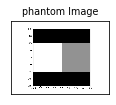

In [3]:
matplotlib.rcParams['font.size'] = 8.0
img = cv2.imread('C:\\Users\\Ghada\\Downloads\\created_phantom_in_python.png', 0)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('phantom Image'), plt.xticks([]), plt.yticks([])
plt.show()

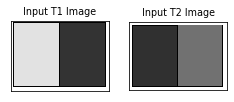

In [4]:
matplotlib.rcParams['font.size'] = 8.0
img1 = cv2.imread('C:\\Users\\Ghada\\Downloads\\phantomT1.png', 0)
img2 = cv2.imread('C:\\Users\\Ghada\\Downloads\\phantomT2.png', 0)

plt.subplot(131),plt.imshow(img1, cmap = 'gray')
plt.title('Input T1 Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(img2, cmap = 'gray')
plt.title('Input T2 Image'), plt.xticks([]), plt.yticks([])

plt.show()

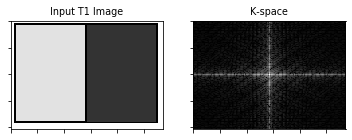

In [6]:
matplotlib.rcParams['font.size'] = 8.0
np.random.seed(19680801)

img = cv2.imread('C:\\Users\\Ghada\\Downloads\\phantomT1.png', 0)
dim = range(img.ndim)

k = fftshift(fftn(ifftshift(img1, axes=dim), s=None, axes=dim), axes=dim)
k /= np.sqrt(np.prod(np.take(img1.shape, dim)))
k = np.real(k)
magnitude_spectrum = np.log(np.abs(k) + 1)

images = []

fig, axs = plt.subplots(1, 2)

for j in range(2):
    axs[j].set_yticklabels([])
    axs[j].set_xticklabels([])

data = [img, magnitude_spectrum]

images.append(axs[0].imshow(data[0], cmap='gray'))

axs[0].set_title('Input T1 Image')

images.append(axs[1].imshow(data[1], cmap='gray'))


axs[1].set_title('K-space')

cv2.imwrite("k-space.jpg",k)

plt.show()

In [7]:
Mag_Field = np.random.randint(low= 1 , high= 100, size = 15)
print (Mag_Field)

[21 85 61  7 35 35 24 68 50 37 19 76 73 38 12]


In [8]:
larmorFreq_Hydrogen =42.58*Mag_Field
print(larmorFreq_Hydrogen)

[ 894.18 3619.3  2597.38  298.06 1490.3  1490.3  1021.92 2895.44 2129.
 1575.46  809.02 3236.08 3108.34 1618.04  510.96]


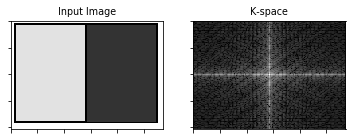

In [9]:
matplotlib.rcParams['font.size'] = 8.0
np.random.seed(19680801)

img = cv2.imread('C:\\Users\\Ghada\\Downloads\\phantomT1.png', 0)
dim = range(img.ndim)
for i in range(15):
    k_nonUniform= Mag_Field[i] * fftshift(fftn(ifftshift(img, axes=dim), s=None, axes=dim), axes=dim)
    k_nonUniform /= np.sqrt(np.prod(np.take(img.shape, dim)))
    k_nonUniform =  np.real(k_nonUniform)
    magnitude_spectrum1 = np.log(np.abs(k_nonUniform) + 1)

images = []

fig, axs = plt.subplots(1, 2)

for j in range(2):
    axs[j].set_yticklabels([])
    axs[j].set_xticklabels([])

data = [img, magnitude_spectrum1]

images.append(axs[0].imshow(data[0], cmap='gray'))
axs[0].set_title('Input Image')

images.append(axs[1].imshow(data[1], cmap='gray'))
axs[1].set_title('K-space')

cv2.imwrite("k-space_nonUniform.jpg",k_nonUniform)

plt.show()

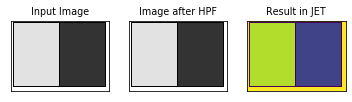

In [10]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
f_ishift = np.fft.ifftshift(fshift)
Kspace_inverse= np.fft.ifft2(f_ishift)
Kspace_inverse = np.abs(Kspace_inverse)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(Kspace_inverse, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([]) #HPF: high pass filter
plt.subplot(133),plt.imshow(Kspace_inverse)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

cv2.imwrite("Inverse.jpg",Kspace_inverse)

plt.show()